In [342]:
import pandas as pd
import networkx as nx
from tqdm import tqdm
import matplotlib.pyplot as plt
from collections import Counter
import operator
import re
from netgraph import Graph

In [144]:
meta = pd.read_csv("data/meta.csv")


In [145]:
house_actorvar = meta.loc[meta["id"] == "houseofcards","actor_variable"].values[0]

In [146]:
house_data = pd.read_csv("data/houseofcards/attributes.csv")

In [147]:
[a.lower() for a in house_data[house_actorvar].dropna().to_list()]

['damian young',
 'shawn doyle',
 'malcolm madera',
 'kate mara',
 'larry pine',
 'reed birney',
 'wass stevens',
 'murphy guyer',
 'lance e. nichols',
 'sandrine holt',
 'david lyon',
 'dominique mcelligott',
 'david andrews',
 'christian camargo',
 'susannah hoffman',
 'mahershala ali',
 'cicely tyson',
 'elizabeth marvel',
 'jayne atkinson',
 'hazel honeysuckle',
 'margaret daly',
 'jenna stern',
 'ellen burstyn',
 'samuel page',
 'kristen connolly',
 'ben daniels',
 'sebastian arcelus',
 'derek cecil',
 'jeremy holm',
 'boris mcgiver',
 'kitty aldridge',
 'neve campbell',
 'malcolm goodwin',
 'darren alford',
 'reg e. cathey',
 'tawny cypress',
 'libby woodbridge',
 'marc kudisch',
 'karl kenzler',
 'francie swift',
 'carme boixadera',
 'teresa castracane',
 'bill phillips',
 't.j. edwards',
 'elizabeth norment',
 'kevin kilner',
 'michael kitchen',
 'gil birmingham',
 'j.c. mackenzie',
 'hollis mccarthy',
 'paul freeman',
 'angela christian',
 'clark carmichael',
 'unknown',
 'dan

In [148]:
actordict = {}
for id in tqdm(meta["id"]):
    #print(id)
    actorvar = meta.loc[meta["id"] == id,"actor_variable"].values[0]
    if actorvar == 'no':
        pass
    else:
        temp_data = pd.read_csv("data/{}/attributes.csv".format(id))
        
        actorlist = [a.lower() for a in temp_data[actorvar].dropna().to_list()]
        actordict[id] = actorlist




100%|██████████| 138/138 [00:01<00:00, 105.96it/s]


In [149]:
actordict

{'walkingdead': ['drake ethan light',
  'ross marquand (appearance)',
  'ross marquand',
  'aasim zubair (appearance)[1]ritesh rajan (voice)',
  'grégory lu',
  'alex fernandez',
  'alex martin',
  'michael cudlitz (appearance)',
  'michael cudlitz',
  'michael cudlitz',
  'gina morelli',
  'becky shaw',
  'nona parker johnson',
  'unknown',
  'andrew patrick ralston',
  'collete and unknown (s9)unknown (s10)noah and preston wilbourn (s11)unknown ("rest in peace")',
  'tba',
  'kelley mack',
  'jeris donovan',
  'jonathan medina',
  'andrew rusk',
  'charissa allen',
  'keely mcallister',
  'tba',
  'matt burke',
  'laurie fortier',
  'christopher sabat',
  'tbd',
  'gershwyn eustache (appearance; motion capture, trailer)[1]john macmillan (motion capture) [2]warren burke (voice)',
  'unknown',
  'breeda wool',
  'troy baker',
  'daniel bonjour',
  'naïa pichler',
  'haley leary',
  'tba',
  'jonathan goldstein',
  'josh lenn',
  'benjamin papac',
  'joel mcdonald',
  'callan mcauliffe'

In [150]:
# Create an empty bipartite graph
B = nx.Graph()

# Add nodes from the first partition (keys)
B.add_nodes_from(actordict.keys(), bipartite=0)

# Add nodes from the second partition (values)
B.add_nodes_from([node for nodes in actordict.values() for node in nodes], bipartite=1)

# Add edges between the two partitions
for node, neighbors in tqdm(actordict.items()):
    B.add_edges_from((node, neighbor) for neighbor in neighbors)



100%|██████████| 114/114 [00:00<00:00, 609.79it/s]


In [151]:
nx.is_bipartite(B)

True

In [152]:
B.degree

DegreeView({'walkingdead': 1699, 'simpsons': 627, 'arrow': 1975, 'greysanatomy': 3034, 'supernatural': 1540, 'southpark': 271, 'bones': 1503, 'house': 1385, 'familyguy': 44, 'dexter': 699, 'criminalminds': 816, 'avatar': 237, 'prisonbreak': 116, 'expanse': 321, 'futurama': 87, 'sonsofanarchy': 612, 'lostpedia': 446, 'thementalist': 577, 'boardwalkempire': 514, 'rickandmorty': 110, 'gameofthrones': 493, 'breakingbad': 481, 'sopranos': 459, 'gotham': 397, 'bigbangtheory': 238, 'friends': 136, 'for-all-mankind': 209, 'howtogetawaywithmurder': 260, 'onceuponatime': 273, 'riverdale': 284, 'bojackhorseman': 174, 'orange-is-the-new-black': 332, 'vampirediaries': 310, 'seinfeld': 293, 'americanhorrorstory': 198, 'squid-game': 64, 'theoffice': 215, 'brooklyn99': 235, 'how-i-met-your-mother': 256, 'prettylittleliars': 203, 'modernfamily': 210, 'thewire': 250, 'downtonabbey': 185, 'jackryan': 172, 'fargo': 217, 'narcos': 109, 'fearthewalkingdead': 172, 'fringe': 211, 'vikings': 242, 'parksandrecr

In [153]:
list(actordict.keys())

['walkingdead',
 'simpsons',
 'arrow',
 'greysanatomy',
 'supernatural',
 'southpark',
 'bones',
 'house',
 'familyguy',
 'dexter',
 'criminalminds',
 'avatar',
 'prisonbreak',
 'expanse',
 'futurama',
 'sonsofanarchy',
 'lostpedia',
 'thementalist',
 'boardwalkempire',
 'rickandmorty',
 'gameofthrones',
 'breakingbad',
 'sopranos',
 'gotham',
 'bigbangtheory',
 'friends',
 'for-all-mankind',
 'howtogetawaywithmurder',
 'onceuponatime',
 'riverdale',
 'bojackhorseman',
 'orange-is-the-new-black',
 'vampirediaries',
 'seinfeld',
 'americanhorrorstory',
 'squid-game',
 'theoffice',
 'brooklyn99',
 'how-i-met-your-mother',
 'prettylittleliars',
 'modernfamily',
 'thewire',
 'downtonabbey',
 'jackryan',
 'fargo',
 'narcos',
 'fearthewalkingdead',
 'fringe',
 'vikings',
 'parksandrecreation',
 'yellowstone',
 'the-handmaids-tale',
 'archer',
 'the100',
 'sexeducation',
 'houseofcards',
 'black-mirror',
 'themandalorian',
 'bridgerton',
 'the-boys',
 'heroes',
 'glee',
 'westworld',
 'suits'

In [154]:
series_graph = nx.projected_graph(B,nodes = list(actordict.keys()),multigraph=True)

In [155]:
list(dict(series_graph["walkingdead"]["fringe"]).keys())

['omid abtahi',
 'nance williamson',
 'jason butler harner',
 'lisa emery',
 'kirk acevedo']

In [156]:
meta.head()

,id,nodes,edges,attribute-count,title,imdb-score,imdb-votes,fandom-title,fandom-category,fandom-pages,fandom-images,fandom-videos,actor_variable
0,walkingdead,5942,72746,29,The Walking Dead,8.1,1069183,Walking Dead Wiki,tv,10K,100K,1K,actor
1,simpsons,5410,30943,52,The Simpsons,8.7,432296,Simpsons Wiki,tv,20K,100K,1K,voiced-by
2,arrow,3681,28806,20,The Flash,7.5,366576,Arrowverse Wiki,tv,10K,20K,2K,actor
3,greysanatomy,3457,13554,27,Happy Valley,8.5,63294,Grey's Anatomy Universe Wiki,tv,10K,40K,2K,portrayed-by
4,24,3180,73590,1,24,8.4,195824,Wiki 24,tv,9K,10K,10,no


### Text cleaning

In [216]:

# Function to check if a string is a valid name
stopwords = ["unknown","tba","tbd"]
def is_valid_name(name):
    # You can modify this function based on your criteria for valid names
    cleaned_name = re.sub(r'[^a-zA-Z]', '', name)

    if operator.contains(stopwords,cleaned_name):
        return False
    return cleaned_name.isalpha()


In [223]:
def clean_text(actorlist):
# Split elements by "and" and filter out invalid names
    split_names = []
    for item in actorlist:
        names = item.split(" ")[:2]
        if len(names)<2:
            pass
        else:
            name = names[0] + " "+ names[1]
            if is_valid_name(name):
                split_names.append(name)
                

    # Overwrite the original names_list with split and filtered names
    return set(split_names)


In [228]:
actordict = {}
for id in tqdm(meta["id"]):
    #print(id)
    actorvar = meta.loc[meta["id"] == id,"actor_variable"].values[0]
    if actorvar == 'no':
        pass
    else:
        temp_data = pd.read_csv("data/{}/attributes.csv".format(id))
        actorlist = clean_text([a.lower() for a in temp_data[actorvar].dropna().to_list()])
        actordict[id] = actorlist



100%|██████████| 138/138 [00:01<00:00, 108.42it/s]


In [229]:
len(actordict["walkingdead"])

1620

In [230]:
# Create network
# Create an empty bipartite graph
B = nx.Graph()

# Add nodes from the first partition (keys)
B.add_nodes_from(actordict.keys(), bipartite=0)

# Add nodes from the second partition (values)
B.add_nodes_from([node for nodes in actordict.values() for node in nodes], bipartite=1)

# Add edges between the two partitions
for node, neighbors in tqdm(actordict.items()):
    B.add_edges_from((node, neighbor) for neighbor in neighbors)

100%|██████████| 114/114 [00:00<00:00, 1729.43it/s]


In [243]:
series_graph = nx.projected_graph(B,nodes = list(actordict.keys()),multigraph=True)

In [245]:
series_graph.edges

MultiEdgeView([('walkingdead', 'ted-lasso', 'maximilian osinski'), ('walkingdead', 'fringe', 'omid abtahi'), ('walkingdead', 'fringe', 'nance williamson'), ('walkingdead', 'fringe', 'jason butler'), ('walkingdead', 'fringe', 'lisa emery'), ('walkingdead', 'fringe', 'kirk acevedo'), ('walkingdead', 'newgirl', 'sonequa martin-green'), ('walkingdead', 'how-i-met-your-mother', 'jon bernthal'), ('walkingdead', 'how-i-met-your-mother', 'bryan cranston'), ('walkingdead', 'scrubs', 'gina morelli'), ('walkingdead', 'scrubs', 'michael j.'), ('walkingdead', 'scrubs', 'james michael'), ('walkingdead', 'scrubs', 'michael mosley'), ('walkingdead', 'scrubs', 'adam harrington'), ('walkingdead', 'howtogetawaywithmurder', 'john eric'), ('walkingdead', 'howtogetawaywithmurder', 'mercedes mason'), ('walkingdead', 'howtogetawaywithmurder', 'ron bottitta'), ('walkingdead', 'howtogetawaywithmurder', 'teya patt'), ('walkingdead', 'howtogetawaywithmurder', 'michelle hurd'), ('walkingdead', 'howtogetawaywithmur

In [253]:
edge_df = nx.to_pandas_edgelist(series_graph,edge_key="actor")
edge_df.head()

,source,target,actor
0,walkingdead,ted-lasso,maximilian osinski
1,walkingdead,fringe,omid abtahi
2,walkingdead,fringe,nance williamson
3,walkingdead,fringe,jason butler
4,walkingdead,fringe,lisa emery


In [271]:
weight_edge_df = edge_df.groupby(["source","target"])["actor"].agg('count').reset_index()
weight_edge_df=weight_edge_df.rename(columns={"actor":"weight"})

In [277]:
weight_edge_df["weight"].argmax()

1006

In [282]:
weight_edge_df.loc[1006]
asd = edge_df.loc[(edge_df["source"] == "greysanatomy")&
            (edge_df["target"] == "bones"),:]

In [295]:
weighted_graph = nx.from_pandas_edgelist(weight_edge_df,edge_attr=True)

In [310]:
comms = nx.community.louvain_communities(weighted_graph,weight="weight")

In [384]:
# Create a dictionary mapping nodes to their community IDs
node_to_community = {}
for i, comm in enumerate(comms):
    for node in comm:
        node_to_community[node] = i
node_colors = [node_to_community[node] for node in weighted_graph.nodes()]
pos = nx.spring_layout(weighted_graph, k = 0.1, iterations=10)

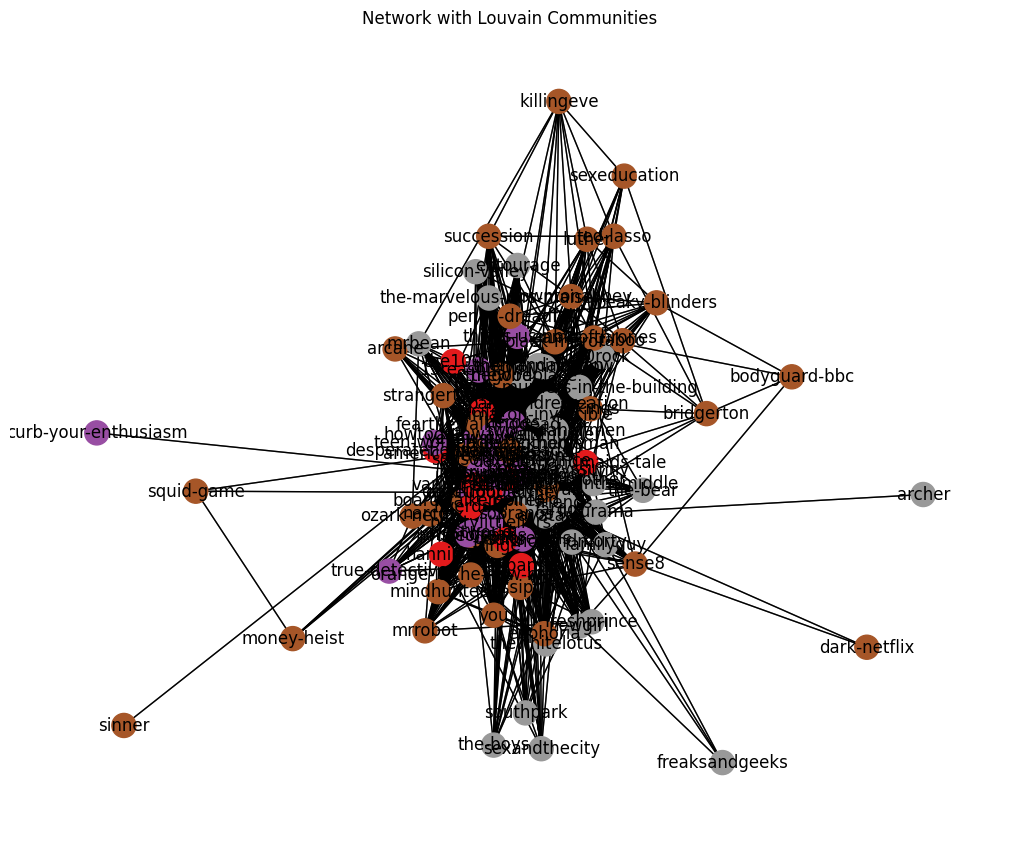

In [341]:
plt.figure(figsize=(10, 8))
nx.draw(weighted_graph, pos, node_size=300, cmap=plt.cm.Set1, node_color=node_colors)
nx.draw_networkx_edges(weighted_graph, pos, alpha=0.5)
nx.draw_networkx_labels(weighted_graph, pos)
plt.title("Network with Louvain Communities")
plt.show()

### Visualizations

In [343]:

partition_sizes = [10, 20, 30, 40]
g = nx.random_partition_graph(partition_sizes, 0.5, 0.1)

In [348]:
g.nodes[11]["block"]

1

In [356]:
nx.set_node_attributes(weighted_graph, node_to_community,"community")

In [358]:
weighted_graph.nodes["13reasonswhy"]["community"]

1

In [366]:
community_to_color = {
    0 : 'tab:blue',
    1 : 'tab:orange',
    2 : 'tab:green',
    3 : 'tab:red',
    4 : 'tab:red'
}

In [367]:
node_color = {node: community_to_color[community_id] \
              for node, community_id in node_to_community.items()}

In [368]:
node_color

{'suits': 'tab:blue',
 'the-handmaids-tale': 'tab:blue',
 'onceuponatime': 'tab:blue',
 'the100': 'tab:blue',
 'supernatural': 'tab:blue',
 'vampirediaries': 'tab:blue',
 'desperatehousewives': 'tab:blue',
 'lucifer': 'tab:blue',
 'hannibal': 'tab:blue',
 'expanse': 'tab:blue',
 'riverdale': 'tab:blue',
 'arrow': 'tab:blue',
 'westworld': 'tab:orange',
 'teen-wolf-pack': 'tab:orange',
 'this-is-us-nbc': 'tab:orange',
 'yellowstone': 'tab:orange',
 'breakingbad': 'tab:orange',
 'house': 'tab:orange',
 '13reasonswhy': 'tab:orange',
 'goodtrouble': 'tab:orange',
 'bones': 'tab:orange',
 'greysanatomy': 'tab:orange',
 'prisonbreak': 'tab:orange',
 'prettylittleliars': 'tab:orange',
 'heroes': 'tab:orange',
 'dexter': 'tab:orange',
 'for-all-mankind': 'tab:orange',
 'criminalminds': 'tab:orange',
 'thementalist': 'tab:orange',
 'lostpedia': 'tab:orange',
 'gilmoregirls': 'tab:orange',
 'sonsofanarchy': 'tab:orange',
 'true-detective': 'tab:orange',
 'curb-your-enthusiasm': 'tab:orange',
 's

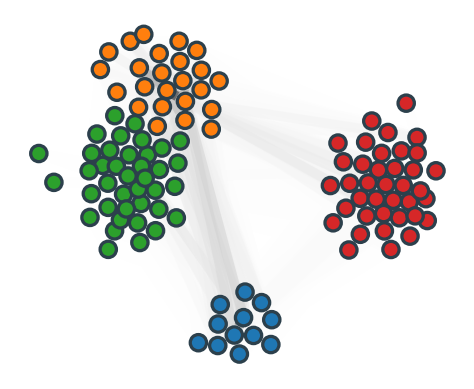

In [377]:
fig, ax = plt.subplots()
Graph(weighted_graph,
      node_color=node_color, # indicates the community each belongs to  
      node_edge_width=1,     # no black border around nodes 
      edge_width=3,        # use thin edges, as they carry no information in this visualisation
      #edge_alpha=1,        # low edge alpha values accentuates bundles as they appear darker than single edges
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community),
      ax=ax,
)
plt.show()

c:\Users\tomi\AppData\Local\Programs\Python\Python311\Lib\site-packages\netgraph\_node_layout.py:1024: RuntimeWarning: invalid value encountered in divide
  directions = deltas / magnitudes[:, np.newaxis]
c:\Users\tomi\AppData\Local\Programs\Python\Python311\Lib\site-packages\netgraph\_utils.py:360: RuntimeWarning: invalid value encountered in divide
  v = v / np.linalg.norm(v, axis=-1)[:, None] # unit vector


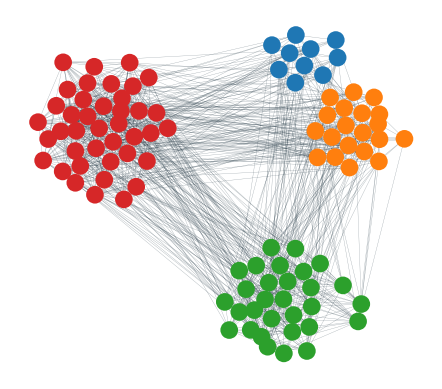

In [385]:
partition_sizes = [10, 20, 30, 40]
g = nx.random_partition_graph(partition_sizes, 0.5, 0.1)
node_to_community = dict()
node = 0
for community_id, size in enumerate(partition_sizes):
    for _ in range(size):
        node_to_community[node] = community_id
        node += 1

# Color nodes according to their community.
community_to_color = {
    0 : 'tab:blue',
    1 : 'tab:orange',
    2 : 'tab:green',
    3 : 'tab:red',
}
node_color1 = {node: community_to_color[community_id] \
              for node, community_id in node_to_community.items()}
fig, ax = plt.subplots()
Graph(g,
      node_color=node_color1, # indicates the community each belongs to  
      node_edge_width=0,     # no black border around nodes 
      edge_width=0.1,        # use thin edges, as they carry no information in this visualisation
      edge_alpha=0.5,        # low edge alpha values accentuates bundles as they appear darker than single edges
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community),
      ax=ax,
)
plt.show()

In [386]:
node_color1

{0: 'tab:blue',
 1: 'tab:blue',
 2: 'tab:blue',
 3: 'tab:blue',
 4: 'tab:blue',
 5: 'tab:blue',
 6: 'tab:blue',
 7: 'tab:blue',
 8: 'tab:blue',
 9: 'tab:blue',
 10: 'tab:orange',
 11: 'tab:orange',
 12: 'tab:orange',
 13: 'tab:orange',
 14: 'tab:orange',
 15: 'tab:orange',
 16: 'tab:orange',
 17: 'tab:orange',
 18: 'tab:orange',
 19: 'tab:orange',
 20: 'tab:orange',
 21: 'tab:orange',
 22: 'tab:orange',
 23: 'tab:orange',
 24: 'tab:orange',
 25: 'tab:orange',
 26: 'tab:orange',
 27: 'tab:orange',
 28: 'tab:orange',
 29: 'tab:orange',
 30: 'tab:green',
 31: 'tab:green',
 32: 'tab:green',
 33: 'tab:green',
 34: 'tab:green',
 35: 'tab:green',
 36: 'tab:green',
 37: 'tab:green',
 38: 'tab:green',
 39: 'tab:green',
 40: 'tab:green',
 41: 'tab:green',
 42: 'tab:green',
 43: 'tab:green',
 44: 'tab:green',
 45: 'tab:green',
 46: 'tab:green',
 47: 'tab:green',
 48: 'tab:green',
 49: 'tab:green',
 50: 'tab:green',
 51: 'tab:green',
 52: 'tab:green',
 53: 'tab:green',
 54: 'tab:green',
 55: 'tab:

In [387]:
node_color

{0: 'tab:blue',
 1: 'tab:blue',
 2: 'tab:blue',
 3: 'tab:blue',
 4: 'tab:blue',
 5: 'tab:blue',
 6: 'tab:blue',
 7: 'tab:blue',
 8: 'tab:blue',
 9: 'tab:blue',
 10: 'tab:orange',
 11: 'tab:orange',
 12: 'tab:orange',
 13: 'tab:orange',
 14: 'tab:orange',
 15: 'tab:orange',
 16: 'tab:orange',
 17: 'tab:orange',
 18: 'tab:orange',
 19: 'tab:orange',
 20: 'tab:orange',
 21: 'tab:orange',
 22: 'tab:orange',
 23: 'tab:orange',
 24: 'tab:orange',
 25: 'tab:orange',
 26: 'tab:orange',
 27: 'tab:orange',
 28: 'tab:orange',
 29: 'tab:orange',
 30: 'tab:green',
 31: 'tab:green',
 32: 'tab:green',
 33: 'tab:green',
 34: 'tab:green',
 35: 'tab:green',
 36: 'tab:green',
 37: 'tab:green',
 38: 'tab:green',
 39: 'tab:green',
 40: 'tab:green',
 41: 'tab:green',
 42: 'tab:green',
 43: 'tab:green',
 44: 'tab:green',
 45: 'tab:green',
 46: 'tab:green',
 47: 'tab:green',
 48: 'tab:green',
 49: 'tab:green',
 50: 'tab:green',
 51: 'tab:green',
 52: 'tab:green',
 53: 'tab:green',
 54: 'tab:green',
 55: 'tab:

In [382]:
len(weighted_graph.edges)

2314

In [383]:
len(g.edges)

1054